In [1]:
%pylab inline
import pandas as pd
import json
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn import metrics

Populating the interactive namespace from numpy and matplotlib


In [2]:
def plot_roc(y_test, preds):
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()


In [21]:
files=!find results/ -name \*.txt |grep dfgc

In [22]:
files

['results/Capsule-Forensics-v2/dfgc2021.txt',
 'results/ClassNSeg/dfgc2021.txt',
 'results/MesoNet/dfgc2021.txt',
 'results/patch-forensics/dfgc2021.txt',
 'results/CNNDetection/dfgc2021.txt',
 'results/adversarial_deepfakes/dfgc2021.txt']

# results/adversarial_deepfakes/dfgc2021.txt

In [23]:
df=pd.read_csv('results/adversarial_deepfakes/dfgc2021.txt', index_col=0, header=None)
df['probability']=df[1]
df['label']=df.index.map(lambda x: int('real' in x))
df['pred']= (df['probability']>0.5).astype(np.int)
df['dataset']=df.index.map(lambda u: u.split('/')[-2])
df['correct']=(df['label']==df['pred']).astype(np.int)

In [24]:
df.groupby('dataset')[['correct']].aggregate(['mean','count'])

correct      
                      mean count
dataset                         
DFGC_SYSU_852924     0.675  1000
DFischerHDA_852673   0.663  1000
ctmiu_853213         0.704  1000
fake_baseline        0.685  1000
jerryHUST_853638     0.686  1000
joshhu_853266        0.687  1000
lowtec_853184        0.689  1000
miaotao_853000       0.676  1000
nbhh_853436          0.687  1000
real_fulls           0.335  1000
seanseattle_853068   0.679  1000
smartz_849705        0.650  1000
wany_853175          0.651  1000
yZzzzzz_849853       0.686  1000
yangquanwei_852303   0.673  1000
yuejiang_852934      0.686  1000
zhaobh_852336        0.670  1000
zz110_853170         0.661  1000

In [25]:
confusion_matrix(df['label'],df['pred'],labels=[0,1])

array([[11508,  5492],
       [  665,   335]])

In [26]:
print(1-df['label'].mean(),(df['label']==df['pred']).mean())

0.9444444444444444 0.6579444444444444


In [27]:
roc_auc_score(df['label'],df['probability'])

0.4964991764705882

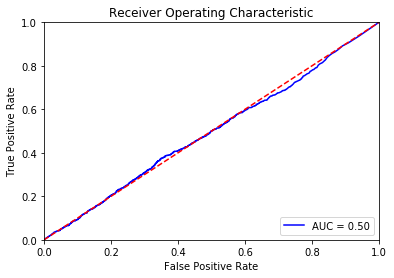

In [28]:
plot_roc(df['label'],df['probability'])

# results/CNNDetection/dfgc2021.txt

In [6]:
df=pd.read_csv('results/CNNDetection/dfgc2021.txt', index_col=0, header=None)
df['probability']=df[1]
df['label']=df.index.map(lambda x: int('real' in x))
df['pred']= (df['probability']>0.5).astype(np.int)
df['dataset']=df.index.map(lambda u: u.split('/')[-2])
df['correct']=(df['label']==df['pred']).astype(np.int)

In [7]:
df.groupby('dataset')[['correct']].aggregate(['mean','count'])

correct      
                      mean count
dataset                         
DFGC_SYSU_852924     0.999  1000
DFischerHDA_852673   1.000  1000
ctmiu_853213         1.000  1000
fake_baseline        1.000  1000
jerryHUST_853638     1.000  1000
joshhu_853266        0.996  1000
lowtec_853184        0.999  1000
miaotao_853000       1.000  1000
nbhh_853436          0.997  1000
real_fulls           0.001  1000
seanseattle_853068   0.999  1000
smartz_849705        0.501  1000
wany_853175          1.000  1000
yZzzzzz_849853       0.999  1000
yangquanwei_852303   0.999  1000
yuejiang_852934      1.000  1000
zhaobh_852336        0.973  1000
zz110_853170         1.000  1000

In [8]:
confusion_matrix(df['label'],df['pred'],labels=[0,1])

array([[16462,   538],
       [  999,     1]])

In [9]:
print(1-df['label'].mean(),(df['label']==df['pred']).mean())

0.9444444444444444 0.9146111111111112


In [10]:
roc_auc_score(df['label'],df['probability'])

0.44131661764705876

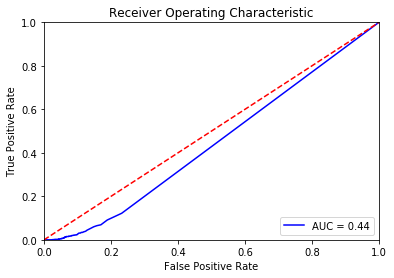

In [13]:
plot_roc(df['label'],df['probability'])

# results/patch-forensics/dfgc2021.txt

In [148]:
df=pd.read_csv('results/patch-forensics/dfgc2021.txt', index_col=0, header=None)
df['probability']=df[1]
df['label']=df.index.map(lambda x: int('real' in x))
df['pred']= (df['probability']>0.5).astype(np.int)
df['dataset']=df.index.map(lambda u: u.split('/')[-2])
df['correct']=(df['label']==df['pred']).astype(np.int)

In [149]:
df.groupby('dataset')[['correct']].aggregate(['mean','count'])

correct      
                      mean count
dataset                         
DFGC_SYSU_852924     0.991  1000
DFischerHDA_852673   0.992  1000
ctmiu_853213         0.999  1000
fake_baseline        0.990  1000
jerryHUST_853638     0.967  1000
joshhu_853266        0.991  1000
lowtec_853184        0.965  1000
miaotao_853000       1.000  1000
nbhh_853436          0.996  1000
real_fulls           0.031  1000
seanseattle_853068   0.999  1000
smartz_849705        0.815  1000
wany_853175          1.000  1000
yZzzzzz_849853       0.997  1000
yangquanwei_852303   0.997  1000
yuejiang_852934      0.911  1000
zhaobh_852336        0.285  1000
zz110_853170         1.000  1000

In [150]:
confusion_matrix(df['label'],df['pred'],labels=[0,1])

array([[15895,  1105],
       [  969,    31]])

In [151]:
print(1-df['label'].mean(),(df['label']==df['pred']).mean())

0.9444444444444444 0.8847777777777778


In [152]:
roc_auc_score(df['label'],df['probability'])

0.5426007352941177

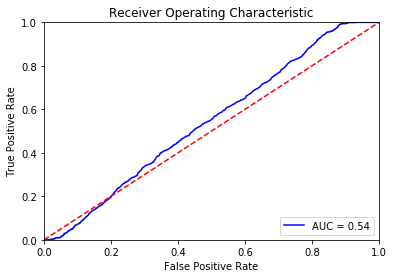

In [153]:
plot_roc(df['label'],df['probability'])

# results/MesoNet/dfgc2021.txt

In [125]:
df=pd.read_csv('results/MesoNet/dfgc2021.txt', index_col=0, header=None)
df['probability']=df[1]
df['label']=df.index.map(lambda x: int('real' in x))
df['pred']= (df['probability']>0.5).astype(np.int)
df['dataset']=df.index.map(lambda u: u.split('/')[-2])
df['correct']=(df['label']==df['pred']).astype(np.int)

In [126]:
df.groupby('dataset')[['correct']].aggregate(['mean','count'])

correct      
                      mean count
dataset                         
DFGC_SYSU_852924     0.918  1000
DFischerHDA_852673   0.981  1000
ctmiu_853213         0.547  1000
fake_baseline        0.900  1000
jerryHUST_853638     0.916  1000
joshhu_853266        0.835  1000
lowtec_853184        0.479  1000
miaotao_853000       0.229  1000
nbhh_853436          0.807  1000
real_fulls           0.239  1000
seanseattle_853068   0.914  1000
smartz_849705        0.918  1000
wany_853175          0.829  1000
yZzzzzz_849853       0.977  1000
yangquanwei_852303   0.386  1000
yuejiang_852934      0.812  1000
zhaobh_852336        0.980  1000
zz110_853170         0.059  1000

In [127]:
confusion_matrix(df['label'],df['pred'],labels=[0,1])

array([[12487,  4513],
       [  761,   239]])

In [128]:
print(1-df['label'].mean(),(df['label']==df['pred']).mean())

0.9444444444444444 0.707


In [129]:
roc_auc_score(df['label'],df['probability'])

0.4938102941176471

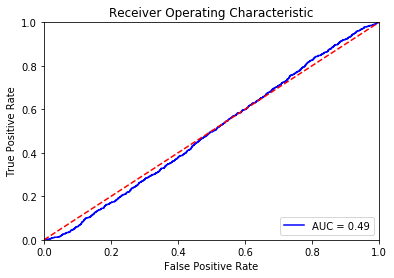

In [130]:
plot_roc(df['label'],df['probability'])

# results/ClassNSeg/dfgc2021.txt

In [135]:
df=pd.read_csv('results/ClassNSeg/dfgc2021.txt', index_col=0, header=None, usecols=[0,2])
df['probability']=df[2]
df['label']=df.index.map(lambda x: int('real' in x))
df['pred']= (df['probability']>0.5).astype(np.int)
df['dataset']=df.index.map(lambda u: u.split('/')[-2])
df['correct']=(df['label']==df['pred']).astype(np.int)

In [136]:
df.groupby('dataset')[['correct']].aggregate(['mean','count'])

correct      
                      mean count
dataset                         
DFGC_SYSU_852924     0.004  1000
DFischerHDA_852673   0.324  1000
ctmiu_853213         0.003  1000
fake_baseline        0.092  1000
jerryHUST_853638     0.039  1000
joshhu_853266        0.030  1000
lowtec_853184        0.125  1000
miaotao_853000       0.002  1000
nbhh_853436          0.032  1000
real_fulls           0.959  1000
seanseattle_853068   0.036  1000
smartz_849705        0.270  1000
wany_853175          0.000  1000
yZzzzzz_849853       0.172  1000
yangquanwei_852303   0.031  1000
yuejiang_852934      0.129  1000
zhaobh_852336        0.032  1000
zz110_853170         0.049  1000

In [137]:
confusion_matrix(df['label'],df['pred'],labels=[0,1])

array([[ 1370, 15630],
       [   41,   959]])

In [138]:
print(1-df['label'].mean(),(df['label']==df['pred']).mean())

0.9444444444444444 0.1293888888888889


In [139]:
roc_auc_score(df['label'],df['probability'])

0.5581960882352941

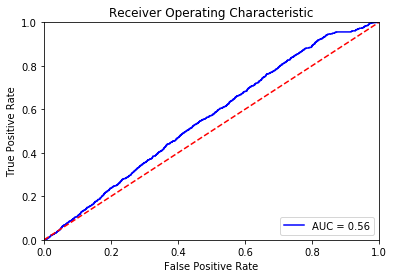

In [140]:
plot_roc(df['label'],df['probability'])

# results/Capsule-Forensics-v2/dfgc2021.txt

In [141]:
df=pd.read_csv('results/Capsule-Forensics-v2/dfgc2021.txt', index_col=0, header=None)
df['probability']=df[2]
df['label']=df.index.map(lambda x: int('real' in x))
df['pred']= (df['probability']>0.5).astype(np.int)
df['dataset']=df.index.map(lambda u: u.split('/')[-2])
df['correct']=(df['label']==df['pred']).astype(np.int)

In [142]:
df.groupby('dataset')[['correct']].aggregate(['mean','count'])

correct      
                      mean count
dataset                         
DFGC_SYSU_852924     0.845  1000
DFischerHDA_852673   0.446  1000
ctmiu_853213         0.876  1000
fake_baseline        0.770  1000
jerryHUST_853638     0.760  1000
joshhu_853266        0.931  1000
lowtec_853184        0.853  1000
miaotao_853000       0.740  1000
nbhh_853436          0.907  1000
real_fulls           0.081  1000
seanseattle_853068   0.939  1000
smartz_849705        0.755  1000
wany_853175          0.624  1000
yZzzzzz_849853       0.761  1000
yangquanwei_852303   0.472  1000
yuejiang_852934      0.855  1000
zhaobh_852336        0.901  1000
zz110_853170         0.635  1000

In [143]:
confusion_matrix(df['label'],df['pred'],labels=[0,1])

array([[13070,  3930],
       [  919,    81]])

In [144]:
print(1-df['label'].mean(),(df['label']==df['pred']).mean())

0.9444444444444444 0.7306111111111111


In [145]:
roc_auc_score(df['label'],df['probability'])

0.38634373529411764

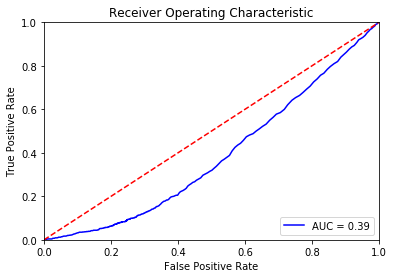

In [146]:
plot_roc(df['label'],df['probability'])

# Exploiting-Visual-Artifacts/dfgc2021_gan

In [109]:
df=pd.read_csv('results/Exploiting-Visual-Artifacts/dfgc2021_gan/scores.csv', index_col=0)
df['probability']=df['Score_kNN']
df['label']=df.index.map(lambda x: int('real' in x))
df['pred']= (df['probability']>0.5).astype(np.int)
df['dataset']=df.index.map(lambda u: u.split('/')[-2])
df['correct']=(df['label']==df['pred']).astype(np.int)

In [110]:
df.groupby('dataset')[['correct']].aggregate(['mean','count'])

correct      
                      mean count
dataset                         
DFGC_SYSU_852924     0.382  1000
DFischerHDA_852673   0.467  1000
ctmiu_853213         0.240  1000
fake_baseline        0.409  1000
jerryHUST_853638     0.382  1000
joshhu_853266        0.326  1000
lowtec_853184        0.263  1000
miaotao_853000       0.256  1000
nbhh_853436          0.333  1000
real_fulls           0.631  1000
seanseattle_853068   0.348  1000
smartz_849705        0.226  1000
wany_853175          0.353  1000
yZzzzzz_849853       0.406  1000
yangquanwei_852303   0.141  1000
yuejiang_852934      0.391  1000
zhaobh_852336        0.323  1000
zz110_853170         0.190  1000

In [111]:
confusion_matrix(df['label'],df['pred'],labels=[0,1])

array([[ 5436, 11564],
       [  369,   631]])

In [112]:
print(1-df['label'].mean(),(df['label']==df['pred']).mean())

0.9444444444444444 0.33705555555555555


In [113]:
roc_auc_score(df['label'],df['probability'])

0.4677083823529412

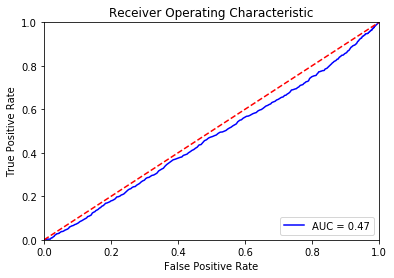

In [114]:
plot_roc(df['label'],df['probability'])

# Exploiting-Visual-Artifacts/dfgc2021_face2face

In [73]:
df=pd.read_csv('results/Exploiting-Visual-Artifacts/dfgc2021_face2face/scores.csv', index_col=0)
df['probability']=df['Score_MLP']
df['label']=df.index.map(lambda x: int('real' in x))
df['pred']= (df['probability']>0.5).astype(np.int)
df['dataset']=df.index.map(lambda u: u.split('/')[-2])
df['correct']=(df['label']==df['pred']).astype(np.int)

In [74]:
df.groupby('dataset')[['correct']].aggregate(['mean','count'])

correct      
                      mean count
dataset                         
DFGC_SYSU_852924     0.981  1000
DFischerHDA_852673   0.800  1000
ctmiu_853213         0.952  1000
fake_baseline        0.847  1000
jerryHUST_853638     0.940  1000
joshhu_853266        0.957  1000
lowtec_853184        0.924  1000
miaotao_853000       0.980  1000
nbhh_853436          0.989  1000
real_fulls           0.135  1000
seanseattle_853068   0.938  1000
smartz_849705        0.779  1000
wany_853175          0.722  1000
yZzzzzz_849853       0.835  1000
yangquanwei_852303   0.808  1000
yuejiang_852934      0.804  1000
zhaobh_852336        0.849  1000
zz110_853170         0.849  1000

In [75]:
confusion_matrix(df['label'],df['pred'],labels=[0,1])

array([[14954,  2046],
       [  865,   135]])

In [76]:
print(1-df['label'].mean(),(df['label']==df['pred']).mean())

0.9444444444444444 0.8382777777777778


In [77]:
roc_auc_score(df['label'],df['probability'])

0.4931554117647059

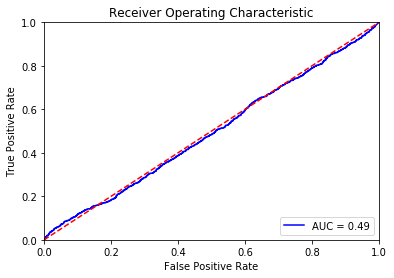

In [78]:
plot_roc(df['label'],df['probability'])

# Exploiting-Visual-Artifacts/dfgc2021_deepfake

In [66]:
df=pd.read_csv('results/Exploiting-Visual-Artifacts/dfgc2021_deepfake/scores.csv', index_col=0)
df['probability']=df['Score_MLP']
df['label']=df.index.map(lambda x: int('real' in x))
df['pred']= (df['probability']>0.5).astype(np.int)
df['dataset']=df.index.map(lambda u: u.split('/')[-2])
df['correct']=(df['label']==df['pred']).astype(np.int)

In [68]:
df.groupby('dataset')[['correct']].aggregate(['mean','count'])

correct      
                      mean count
dataset                         
DFGC_SYSU_852924     0.876  1000
DFischerHDA_852673   0.898  1000
ctmiu_853213         0.887  1000
fake_baseline        0.875  1000
jerryHUST_853638     0.870  1000
joshhu_853266        0.886  1000
lowtec_853184        0.904  1000
miaotao_853000       0.990  1000
nbhh_853436          0.885  1000
real_fulls           0.177  1000
seanseattle_853068   0.857  1000
smartz_849705        0.965  1000
wany_853175          0.992  1000
yZzzzzz_849853       0.911  1000
yangquanwei_852303   0.833  1000
yuejiang_852934      0.937  1000
zhaobh_852336        0.857  1000
zz110_853170         0.976  1000

In [69]:
confusion_matrix(df['label'],df['pred'],labels=[0,1])

array([[15399,  1601],
       [  823,   177]])

In [70]:
print(1-df['label'].mean(),(df['label']==df['pred']).mean())

0.9444444444444444 0.8653333333333333


In [71]:
roc_auc_score(df['label'],df['probability'])

0.5506150588235295

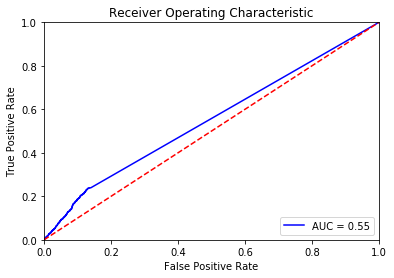

In [72]:
plot_roc(df['label'],df['probability'])

# CVPRW2019_Face_Artifacts

In [52]:
with open('results/CVPRW2019_Face_Artifacts/dfgc2021.json') as f:
    j=json.load(f)
df=pd.DataFrame(j).set_index('file_name')
#df.columns=['headpose_forensic_'+x for x in df.columns]
df['label']=df.index.map(lambda x: int('real' in x))
df['pred']= (df['probability']>0.5).astype(np.int)
df['dataset']=df.index.map(lambda u: u.split('/')[-2])
df['correct']=(df['label']==df['pred']).astype(np.int)

In [54]:
df.groupby('dataset')[['correct']].aggregate(['mean','count'])

correct      
                      mean count
dataset                         
DFGC_SYSU_852924     0.778  1000
DFischerHDA_852673   0.252  1000
ctmiu_853213         0.082  1000
fake_baseline        0.221  1000
jerryHUST_853638     0.869  1000
joshhu_853266        0.041  1000
lowtec_853184        0.933  1000
miaotao_853000       0.865  1000
nbhh_853436          0.980  1000
real_fulls           0.471  1000
seanseattle_853068   0.982  1000
smartz_849705        0.690  1000
wany_853175          0.988  1000
yZzzzzz_849853       0.964  1000
yangquanwei_852303   0.275  1000
yuejiang_852934      0.337  1000
zhaobh_852336        0.641  1000
zz110_853170         0.084  1000

In [55]:
confusion_matrix(df['label'],df['pred'],labels=[0,1])

array([[9982, 7018],
       [ 529,  471]])

In [56]:
print(1-df['label'].mean(),(df['label']==df['pred']).mean())

0.9444444444444444 0.5807222222222223


In [57]:
roc_auc_score(df['label'],df['probability'])

0.539582294117647

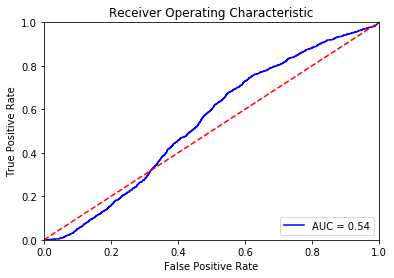

In [58]:
plot_roc(df['label'],df['probability'])

# headpose_forensic

In [28]:
with open('results/headpose_forensic/dfgc2021.json') as f:
    j=json.load(f)
df=pd.DataFrame(j).set_index('file_name')
#df.columns=['headpose_forensic_'+x for x in df.columns]
df['label']=df.index.map(lambda x: int('real' in x))
df['pred']= (df['probability']>0.5).astype(np.int)

In [46]:
df['dataset']=df.index.map(lambda u: u.split('/')[-2])
df['correct']=(df['label']==df['pred']).astype(np.int)

In [49]:
df.groupby('dataset')[['correct']].aggregate(['mean','count'])

correct      
                      mean count
dataset                         
DFGC_SYSU_852924     0.830  1000
DFischerHDA_852673   0.828  1000
ctmiu_853213         0.807  1000
fake_baseline        0.837  1000
jerryHUST_853638     0.862  1000
joshhu_853266        0.845  1000
lowtec_853184        0.810  1000
miaotao_853000       0.826  1000
nbhh_853436          0.875  1000
real_fulls           0.204  1000
seanseattle_853068   0.859  1000
smartz_849705        0.778  1000
wany_853175          0.811  1000
yZzzzzz_849853       0.843  1000
yangquanwei_852303   0.794  1000
yuejiang_852934      0.957  1000
zhaobh_852336        0.809  1000
zz110_853170         0.834  1000

In [32]:
confusion_matrix(df['label'],df['pred'],labels=[0,1])

array([[14205,  2795],
       [  796,   204]])

In [41]:
print(1-df['label'].mean(),(df['label']==df['pred']).mean())

0.9444444444444444 0.8005


In [34]:
roc_auc_score(df['label'],df['probability'])

0.5188052941176471

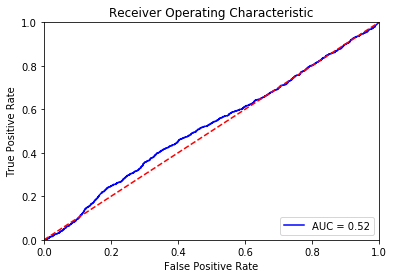

In [39]:
plot_roc(df['label'],df['probability'])